In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as py
import statsmodels.api as sm

In [ ]:
x = np.array([20,60,100,140,180,220,260,300,340,380])
y = np.array([0.18, 0.37, 0.35, 0.78, 0.56, 0.75, 1.18, 1.36, 1.17, 1.65])

In [ ]:
m_x = np.mean(x)
m_y = np.mean(y)
n = np.size(x)
print(m_x, m_y, n)

200.0 0.835 10


In [ ]:
def ABC(x, y, m_x, m_y):
  abc = []
  abc.append(np.sum((x-m_x)*(y-m_y)))
  abc.append(np.sum((x-m_x)*(x-m_x)))
  abc.append(np.sum((y-m_x)*(y-m_y))) 
  return abc 

In [ ]:
abc = ABC(x, y, m_x, m_y)

In [ ]:
b1 = abc[0]/abc[1]
print(b1)

0.0038287878787878786


In [ ]:
b0 = m_y - (b1*m_x)
print(b0)

0.06924242424242422


In [ ]:
sigma_x = (abc[1]/n)**1/2
sigma_y = (abc[2]/n)**1/2
print(sigma_x, sigma_y)

6600.0 0.10687249999999864


In [ ]:
R2 = ((1/n)*abc[0]/(sigma_x*sigma_y))**2
print(R2)

0.005133938556900149


In [ ]:
def plot_regression_line(x, y, b0, b1):
  plt.scatter(x, y, color = "m", marker = "o", s = 30)
  
  y_pred = b0 + b1*x
  
  plt.plot(x, y_pred, color = "g")

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

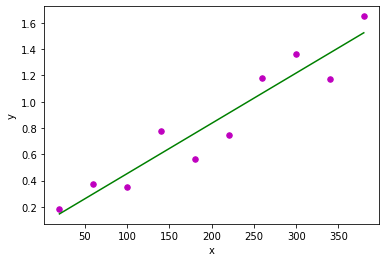

In [ ]:
plot_regression_line(x, y, b0, b1)

In [ ]:
df = pd.read_csv("/content/kaggle_car_dataset.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
c_m_x = np.mean(df['Selling_Price'])
c_m_y = np.mean(df['Present_Price'])
c_n = np.size(df['Present_Price'])

In [ ]:
d = ABC(df['Selling_Price'], df['Present_Price'], c_m_x, c_m_y)

In [ ]:
b1_n = d[0]/d[1]
print(b1_n)

1.4944665659879781


In [ ]:
b0_n = c_m_y - (b1_n*c_m_x)
print(b0_n)

0.6623212112643433


In [ ]:
ksigma_x = (d[1]/c_n)**1/2
ksigma_y = (d[2]/c_n)**1/2

In [ ]:
R2_n = ((1/c_n)*d[0]/(ksigma_x*ksigma_y))**2
R2_n

0.0064477525511771865

In [ ]:
def plot_regression_line_new(x, y, b0, b1):
  plt.scatter(x, y, color = "m", marker = "o", s = 30)
  
  y_pred = b0 + b1*x
  
  plt.plot(x, y_pred, color = "g")

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

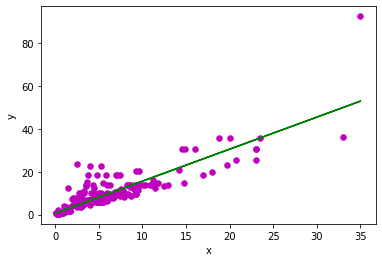

In [ ]:
plot_regression_line(df['Selling_Price'], df['Present_Price'], b0_n, b1_n)

In [ ]:
fit = sm.OLS(df['Selling_Price'], df['Present_Price']).fit()

In [ ]:
fitted = fit.fittedvalues.values

In [ ]:
x = sm.add_constant(df['Selling_Price'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(df['Present_Price'], x).fit()

In [ ]:
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal

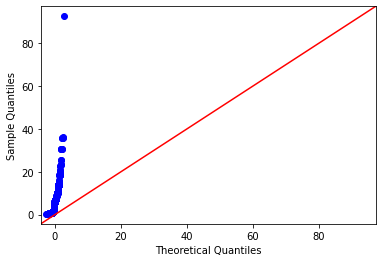

In [ ]:
sm.qqplot(df['Present_Price'], line='45')
py.show()